In [1]:
# Import necessary libraries
from fnal import Dataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts, plot_planes_new

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/data/noise/epoch0/'
data = [Dataset(f'/Users/mueller/data/noise/epoch0/run10265_new.root'), Dataset(f'/Users/mueller/data/montecarlo_rev1.root')]
labels = ['Run 10265 (Model Base)', 'Monte Carlo (Rev. 1)']

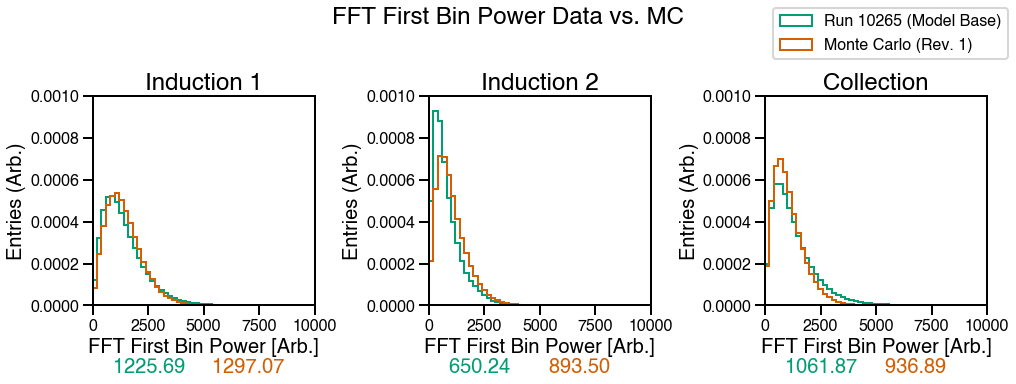

In [3]:
plot_planes_new(data, labels, '!fft_bin0', 'FFT First Bin Power Data vs. MC', normalize=True, cap=0.0010, wired_only=True)

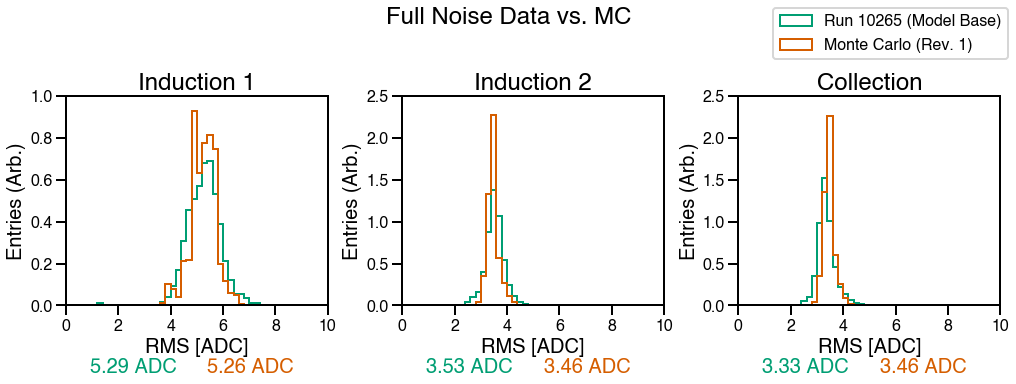

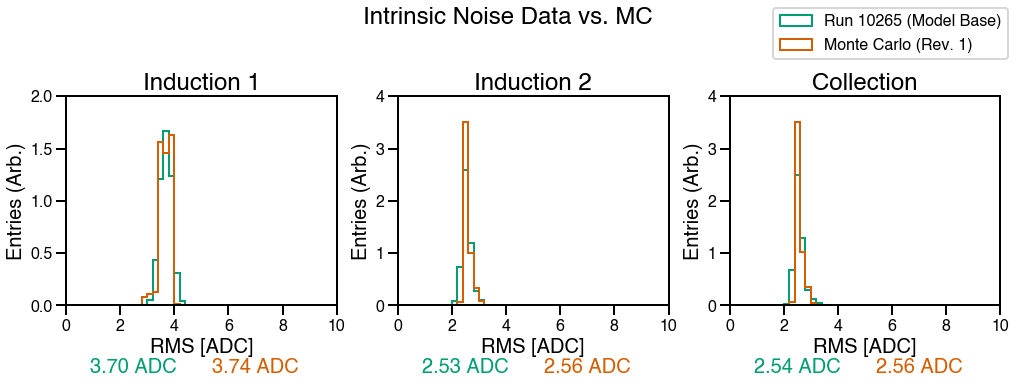

In [9]:
plot_planes_new(data[:2], labels, 'raw_rms', 'Full Noise Data vs. MC', normalize=True, cap=[1, 2.5, 2.5], wired_only=True)
plot_planes_new(data[:2], labels, 'int_rms', 'Intrinsic Noise Data vs. MC', normalize=True, cap=[2, 4, 4], wired_only=True)

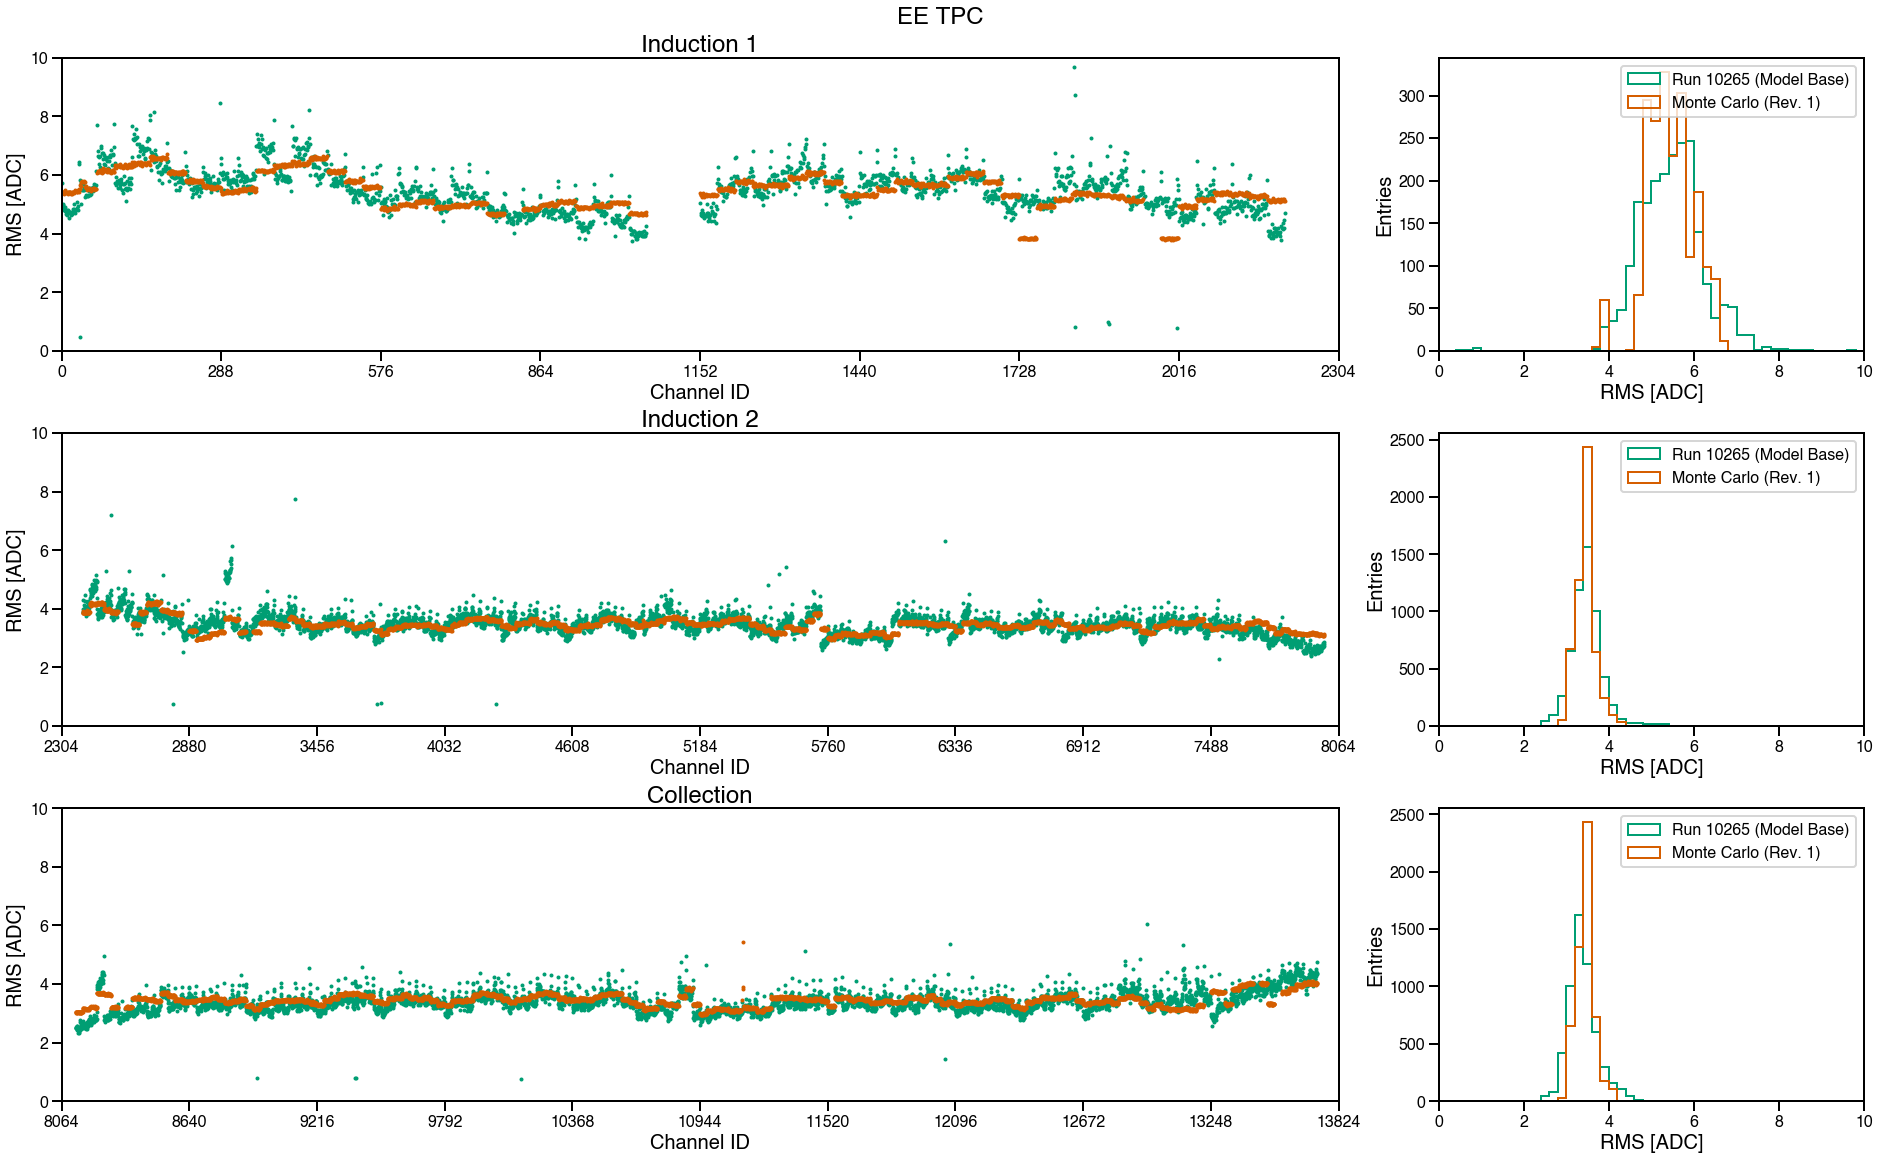

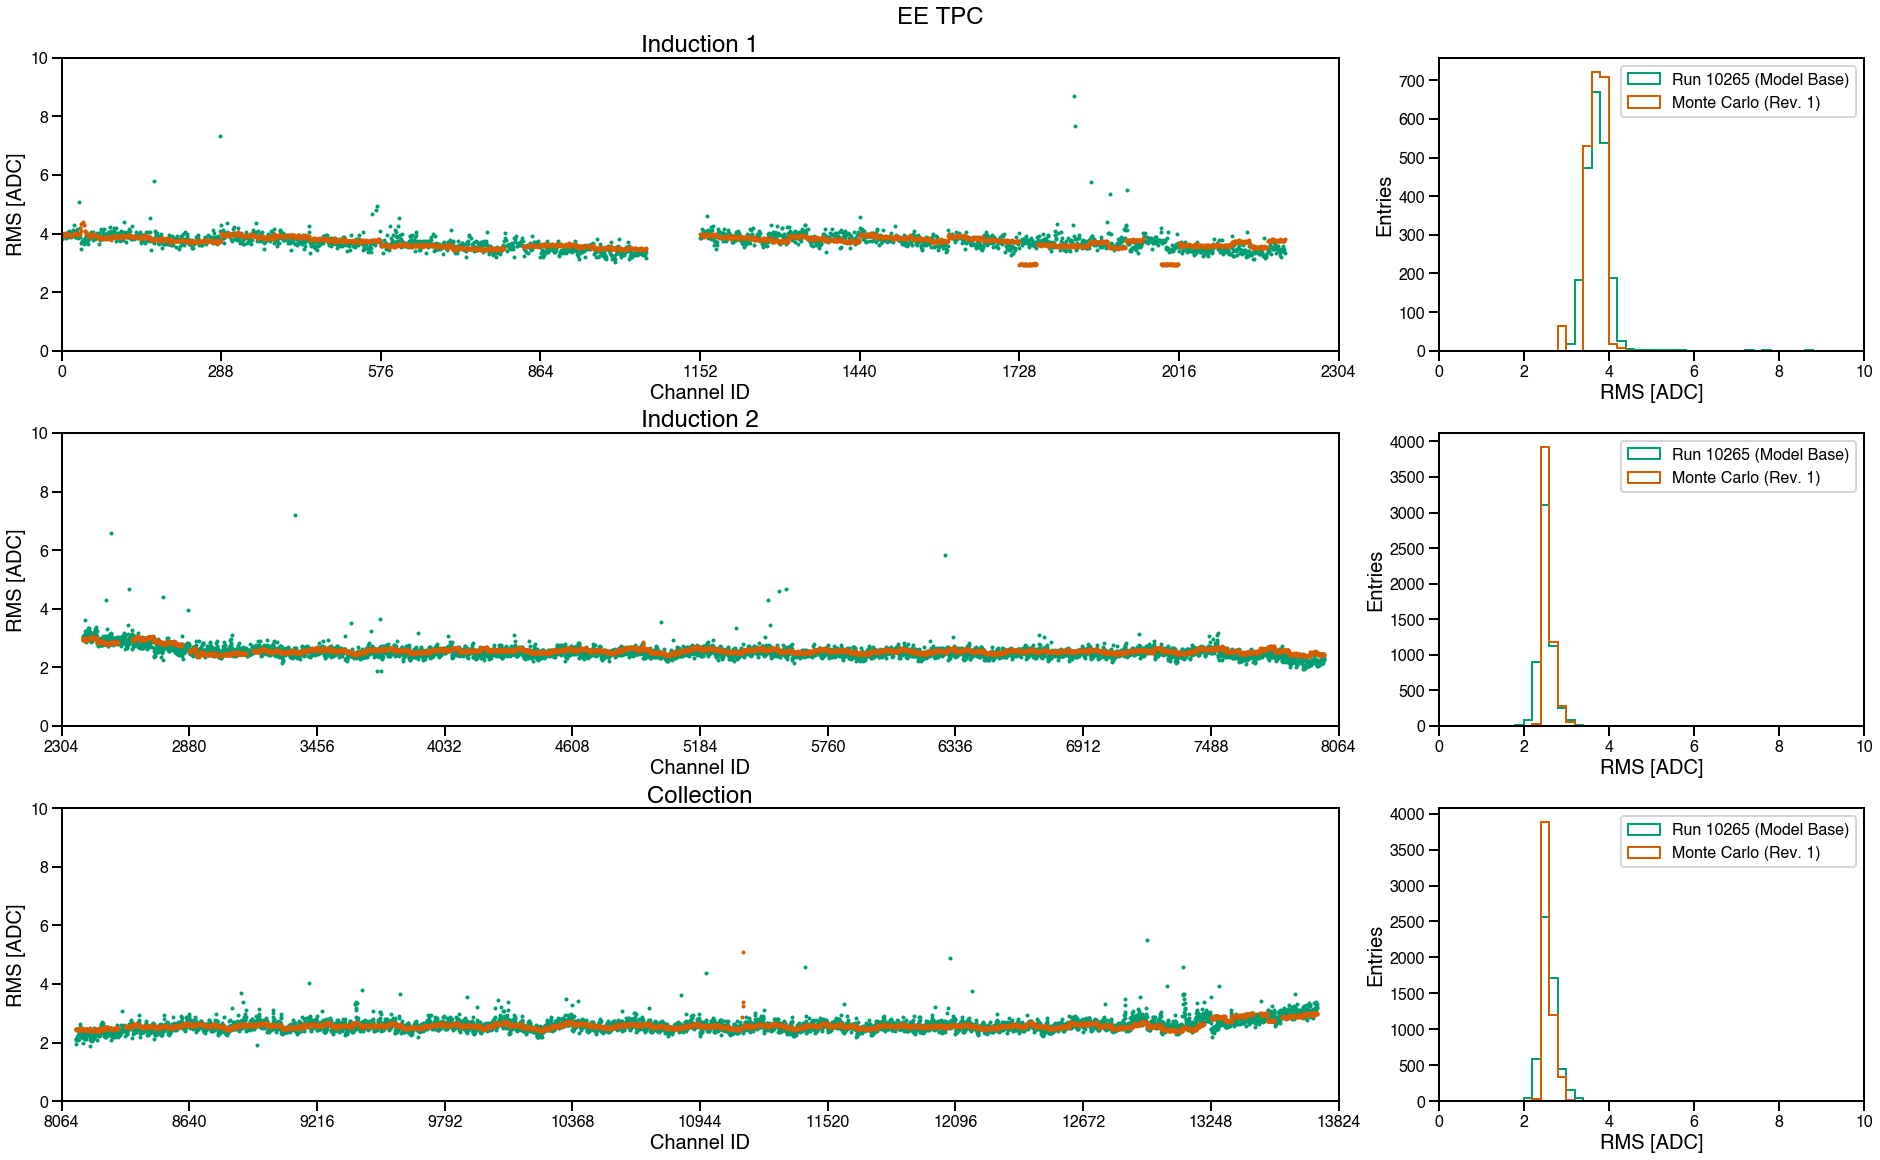

In [10]:
plot_tpc(data[:2], labels, metric='raw_rms', tpc=0, wired_only=True)
plot_tpc(data[:2], labels, metric='int_rms', tpc=0, wired_only=True)

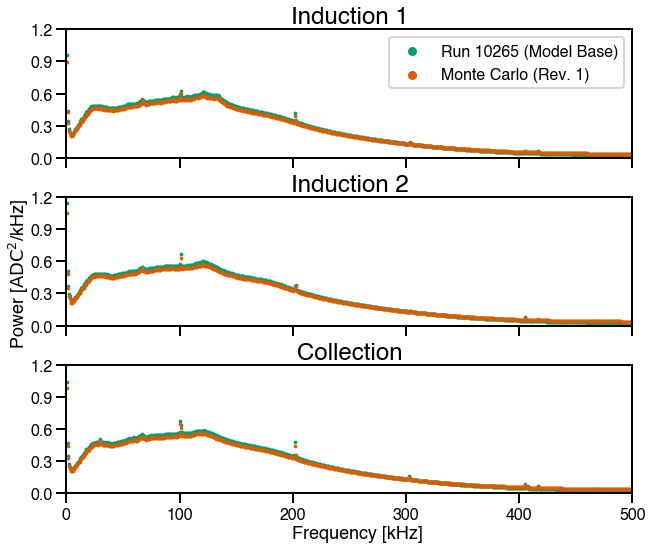

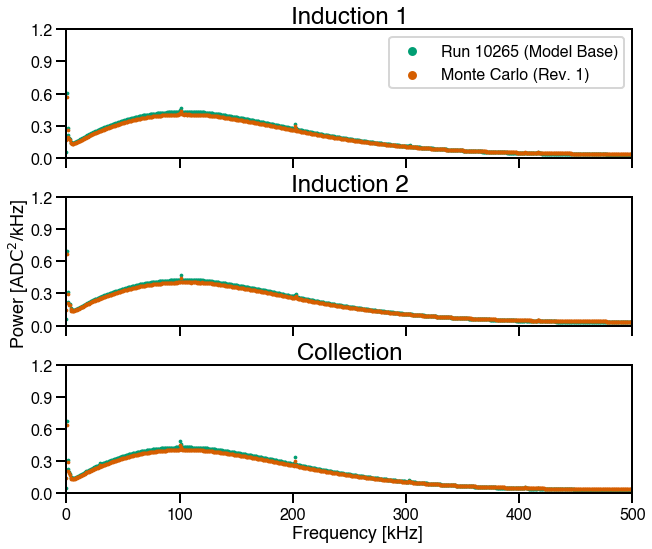

In [6]:
# Comparison of FFTs in data and MC.
plot_ffts(data, labels, 'raw')
plot_ffts(data, labels, 'int')

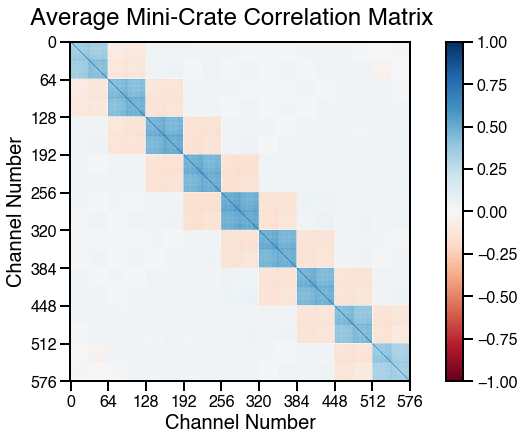

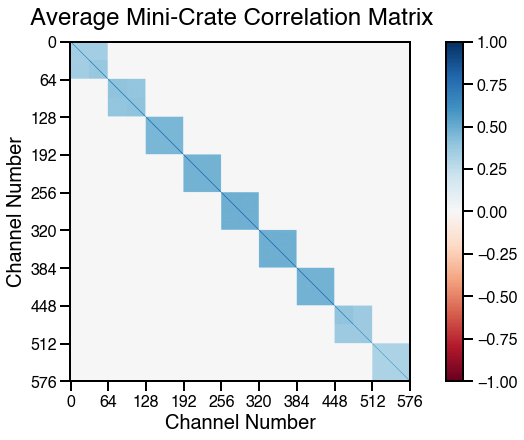

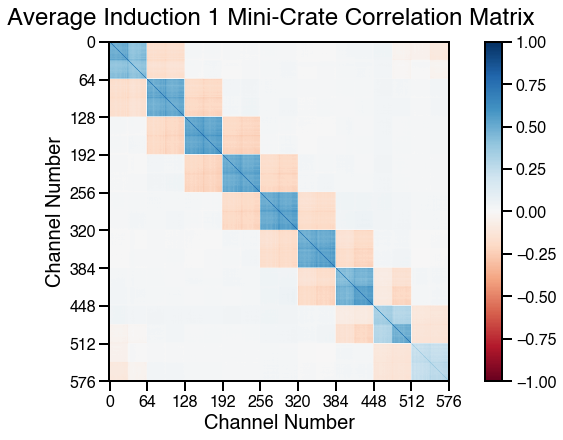

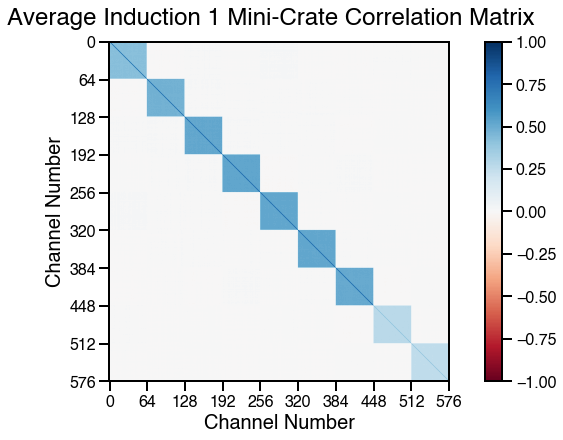

In [7]:
# Comparison of correlation matrices between data and MC.
data[0].plot_correlation_matrix('all')
data[1].plot_correlation_matrix('all')
data[0].plot_correlation_matrix('ind1')
data[1].plot_correlation_matrix('ind1')

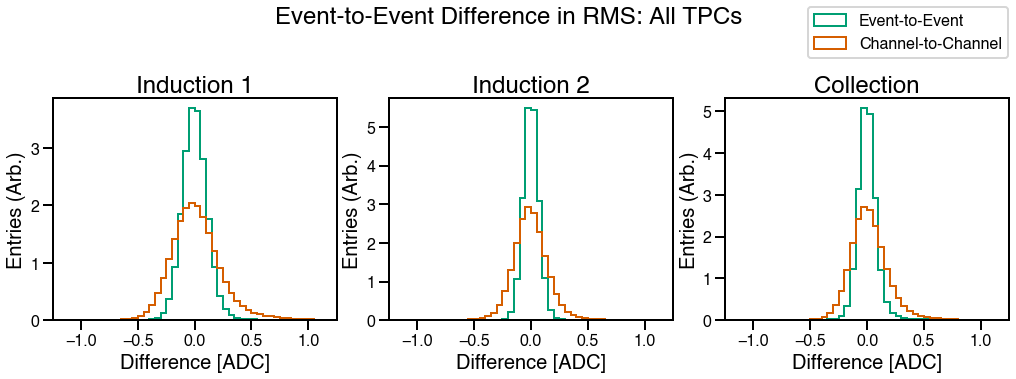

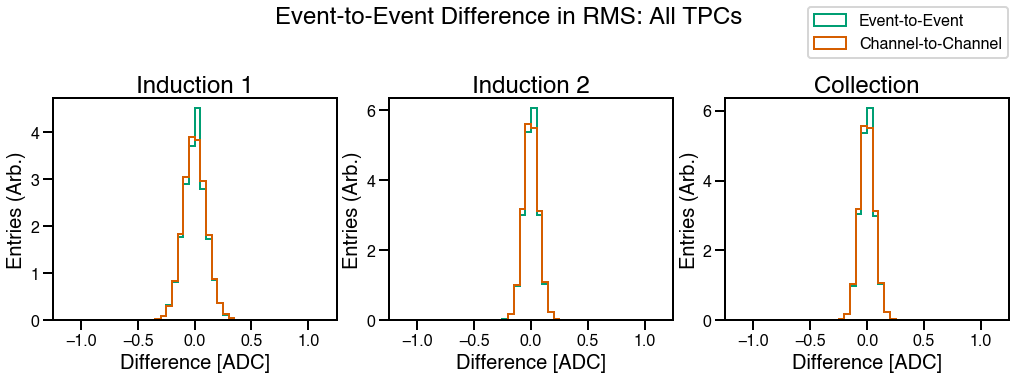

In [8]:
# Comparison of event-to-event and channel-to-channel variations between data and MC.
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])
plot_planes(data[1], 'int_rms', ['e2eabs', 'c2cabs'])